In [1]:
from array import array
import math

In [2]:
# Initial Conditions
length = 32.2 # length of pendulum in feet
method = 1 # 1 = Euler, 2 = Verlet
theta0 = 3.0 # initial angle in radians
omega = 0

theta = theta0

# Other constants
gravity = 32.2 # gravitional acceleration in ft/s^2
g_over_L = gravity/length
time = 0.0
irev = 0.0
tau = 0.00001 # timestep in seconds
nStep = int(1/tau*100.0)

Pi = math.pi

In [3]:
accel = -g_over_L*math.sin(theta)
theta_old = theta - omega*tau + 0.5*tau*tau*accel
print (accel, theta, theta_old)

-0.1411200080598672 3.0 2.999999999992944


In [4]:
t_plot = array('d')
th_plot = array('d')
period = array('d')
trev = array('d')

In [5]:
for iStep in range(1,nStep+1):
    t_plot.append(time)
    th_plot.append(theta*180/Pi)
    time = time + tau
    accel = -g_over_L*math.sin(theta)
    
    if (method == 1):
        theta_old = theta
        theta = theta + tau*omega
        omega = omega + tau*accel
    else:
        theta_new = 2*theta - theta_old + tau*tau*accel
        theta_old = theta
        theta = theta_new
    
    if (theta*theta_old < 0):
        print ("Zero Crossing at time t = %f" % time)
        if (irev == 0):
            time_old = time
        else:
            period.append(2*(time - time_old))
            trev.append(time)
            time_old = time
        irev = irev + 1

Zero Crossing at time t = 4.038900
Zero Crossing at time t = 12.119380
Zero Crossing at time t = 20.202560
Zero Crossing at time t = 28.288450
Zero Crossing at time t = 36.377070
Zero Crossing at time t = 44.468420
Zero Crossing at time t = 52.562510
Zero Crossing at time t = 60.659350
Zero Crossing at time t = 68.758930
Zero Crossing at time t = 76.861280
Zero Crossing at time t = 84.966400
Zero Crossing at time t = 93.074300


In [6]:
nPeriod = int(irev - 1)
print (nPeriod)

11


In [7]:
from ROOT import TCanvas
from ROOT import TGraph, TGraphErrors
from ROOT import gStyle

xcanvas = 1000
ycanvas = 800

c1 = TCanvas( 'c1', 'Pendulum Amplitude vs. Time', 0, 0, xcanvas, ycanvas )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

c2 = TCanvas( 'c2', 'Pendulum Period vs. Time', 0, 0, xcanvas, ycanvas )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )

gr = TGraph(nStep,t_plot,th_plot)
grr = TGraph(nPeriod,trev,period)

Welcome to JupyROOT 6.18/04


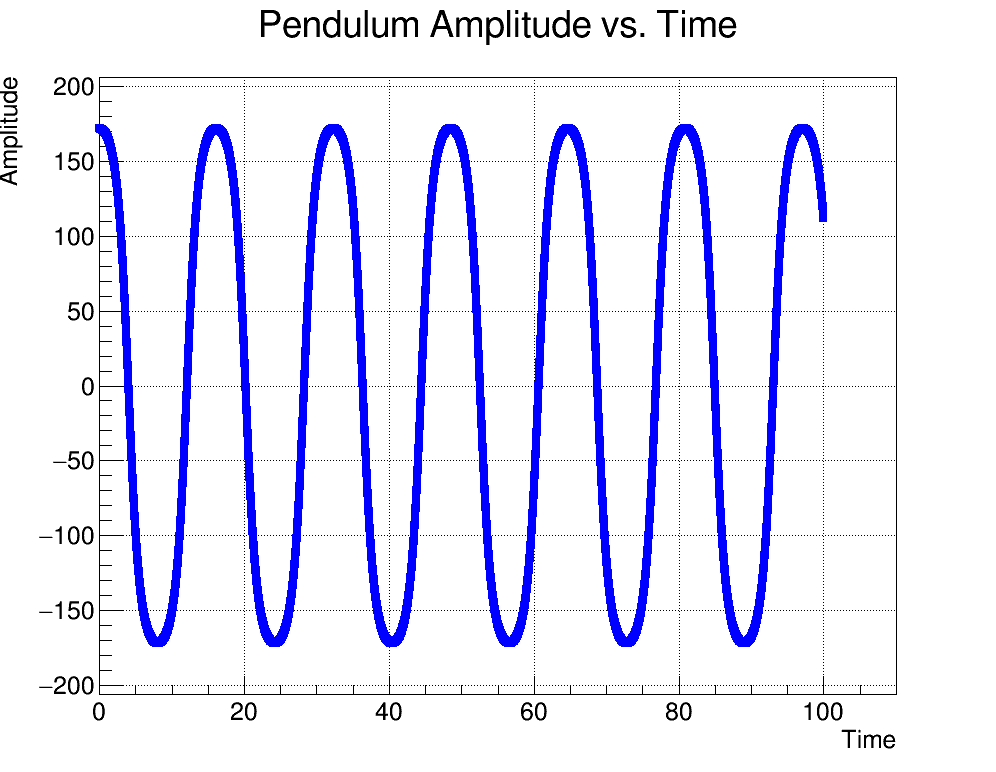

In [8]:
gr.SetMarkerColor(4)
grr.SetMarkerColor(4)
gr.SetMarkerStyle(21)
grr.SetMarkerStyle(22)
gr.SetTitle("Pendulum Amplitude vs. Time")
gr.GetXaxis().SetTitle("Time")
gr.GetYaxis().SetTitle("Amplitude")
grr.SetTitle("Pendulum Period vs. Time")
grr.GetXaxis().SetTitle("Time")
grr.GetYaxis().SetTitle("Period")

c1.cd()
gr.Draw("AP")
c1.Draw()

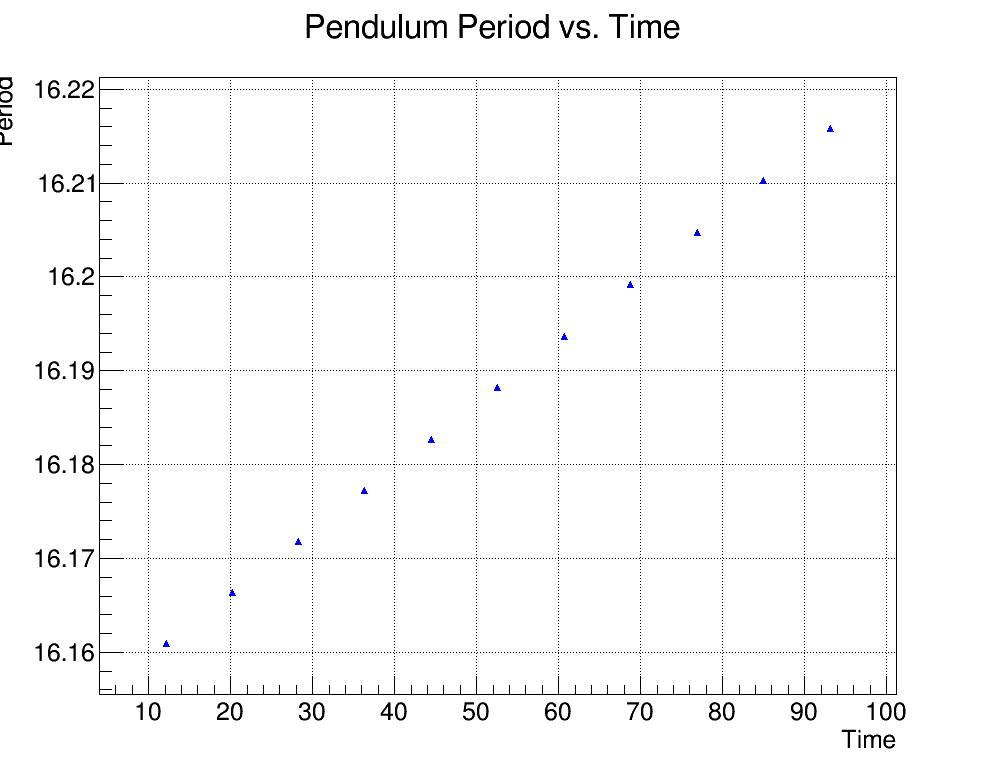

In [9]:
c2.cd()
grr.Draw("AP")
c2.Draw()

In [10]:
AvePeriod = 0.0
ErrorBar = 0.0
for i in range(1,nPeriod+1):
    AvePeriod = AvePeriod + period[i-1]
AvePeriod = AvePeriod/nPeriod
for i in range(1,nPeriod+1):
    ErrorBar = ErrorBar + (period[i-1]-AvePeriod)*(period[i-1]-AvePeriod)
ErrorBar = math.sqrt(ErrorBar/(nPeriod*(nPeriod-1)))
print("Average Period = %f +/- %f" % (AvePeriod,ErrorBar))
    

Average Period = 16.188255 +/- 0.005485


In [11]:
t0=theta0
t_infinite = 2.0*Pi/math.sqrt(g_over_L)*(1.0+t0*t0/16.0+math.pow(t0,4)*11.0/3072.0+math.pow(t0,6)*173.0/737280.0)
error_infinite = 2.0*Pi/math.sqrt(g_over_L)*math.pow(t0,8)*22931.0/1321205760.0

In [12]:
print("Infinite series prediction = %f +/- %f" % (t_infinite,error_infinite))

Infinite series prediction = 12.714630 +/- 0.715488


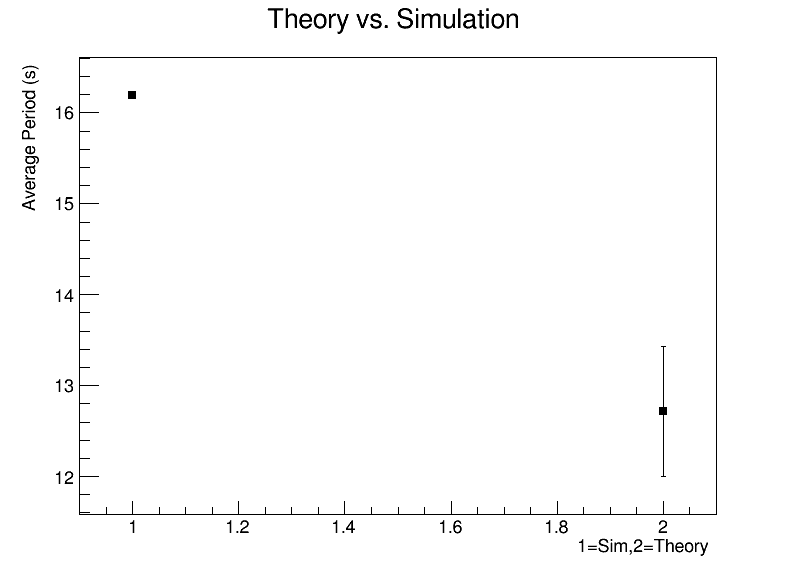

In [13]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')
npoints = 2
x.append(1)
x.append(2)
ex.append(0)
ex.append(0)
y.append(AvePeriod)
y.append(t_infinite)
ey.append(ErrorBar)
ey.append(error_infinite)

c3 = TCanvas("c3","c3",100,0,800,600)
gr3 = TGraphErrors(npoints,x,y,ex,ey)
gr3.SetMarkerStyle(21)
gr3.SetTitle("Theory vs. Simulation")
gr3.GetXaxis().SetTitle("1=Sim,2=Theory")
gr3.GetYaxis().SetTitle("Average Period (s)")
gr3.Draw("AP")
c3.Draw()